In [1]:
import numpy as np
from fFunc import Ffunc
from gFunc import Gfunc
from scipy.optimize import curve_fit
from modelVelocity import ModelVelocity

In [2]:
def gauss(x, *p):
    A, sigma = p
    return A*np.exp(-x**2/(2.*sigma**2))

In [3]:
g_func = Gfunc()
n = 4
Mbulge = 5e10
re_bulge = 0.8
Mbh = 1e10

In [4]:
sigma_Bs = [0.2908075, 0.2908075   , 0.424775  , 0.424775  , 0.424775  , 0.424775 ]
r_ins =    [0.       , 0.2908075   , 0.61265625, 0.816875  , 1.02109375, 1.2253125]
r_outs =   [0.2908075, 0.4846791884, 0.816875  , 1.02109375, 1.2253125 , 1.429531250]

In [5]:
f_funcs = [None]*len(r_outs)
for i in range(len(r_ins)):
    f_funcs[i] = Ffunc(sigma_Bs[i], r_ins[i], r_outs[i])

In [6]:
for k in range(len(r_ins)):
    modelv = ModelVelocity(n, Mbulge, re_bulge, Mbh, sigma_Bs[k], r_ins[k], r_outs[k], g_func, f_func=f_funcs[k])

    vs = np.arange(0, 2000, 100)
    Ivs = np.zeros(vs.shape)
    for i, v in enumerate(vs):
        Ivs[i] = modelv.Iv(v)
    #p0 = [0.1, 300.]
    p0 = [0.1, modelv.sigma(0.5*(r_ins[k]+r_outs[k]))]
    coeff, var_matrix = curve_fit(gauss, vs, Ivs, p0=p0)
    print(coeff[1])

441.39759120877153
409.5449533471801
360.83403225002013
343.2270349937305
327.22495082257444
312.84564848896736


In [10]:
for k in range(len(r_ins)):
    modelv = ModelVelocity(n, Mbulge, re_bulge, Mbh, sigma_Bs[k], r_ins[k], r_outs[k], g_func, f_func=f_funcs[k])

    vs = np.arange(0, 2000, 100)
    Ivs = np.zeros(vs.shape)
    for i, v in enumerate(vs):
        Ivs[i] = modelv.Iv_romb(v)
    #p0 = [0.1, 300.]
    p0 = [0.1, modelv.sigma(0.5*(r_ins[k]+r_outs[k]))]
    coeff, var_matrix = curve_fit(gauss, vs, Ivs, p0=p0)
    print(coeff[1])

441.1982373711938
409.49750138047847
360.81930739027194
343.2196614030257
327.2212520868845
312.8439513739506


In [8]:
for i in range(len(r_ins)):
    modelv = ModelVelocity(n, Mbulge, re_bulge, Mbh, sigma_Bs[i], r_ins[i], r_outs[i], g_func, f_func=f_funcs[i])

    vs = np.arange(0, 2000, 100)
    Ivs_nms = np.zeros(vs.shape)
    for i, v in enumerate(vs):
        Ivs_nms[i] = modelv.Iv_nosmearing(v)
    p0 = [0.1, 300.]
    coeff, var_matrix = curve_fit(gauss, vs, Ivs_nms, p0=p0)
    print(coeff[1])

552.4513136241152
435.8203692468388
367.4493234303472
340.6916242142861
319.7209481139752
302.5343801682661


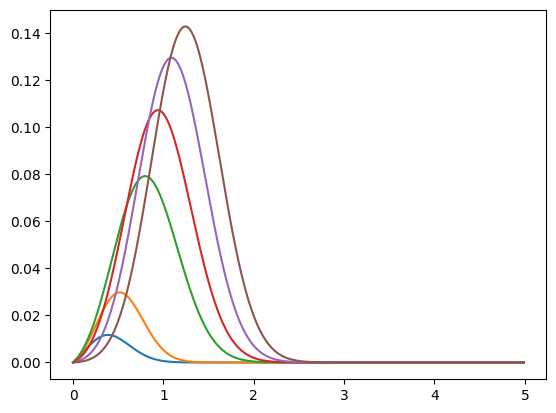

In [9]:
import matplotlib.pyplot as plt
rs = np.arange(0.,5.,0.01)
for i in range(len(r_ins)):
    modelv = ModelVelocity(n, Mbulge, re_bulge, Mbh, sigma_Bs[i], r_ins[i], r_outs[i], g_func, f_func=f_funcs[i])
    v = 100.
    integrand = np.exp(-modelv.b_gaussian*(rs/modelv.re_light)**2-0.5*(v/modelv.sigma(rs))**2) * modelv.f_func.f_interp(rs)*rs
    plt.plot(rs, integrand)